## 빅데이터 활용 AI 설계
# 신경망 기초

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 선형회귀 (1차원 입력값, 절편=0)

```
x = [1,2]
y = [2,4]

pred_y = [1*w, 2*w]
Loss = (w-2)^2 + (2w-4)^2
     = 5(w-2)^2
w = 2
```

```
x = [1,2]
y = [2,5]

pred_y = [1*w, 2*w]
Loss = (w-2)^2 + (2w-5)^2
     = 5w^ - 24w + 29
     = 5(w -2.4)^2 + ...
w = 2.4
```

(-0.15000000000000002, 3.15, -0.36, 7.56)

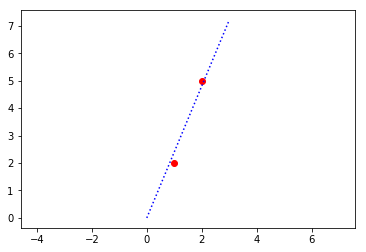

In [35]:
plt.plot([1,2], [2,5], 'ro')
plt.plot([0,3], [0,3*2.4], 'b:')
plt.axis('equal')

### 선형회귀 (1차원 입력값, 절편 있음)

```
x = [1,2]
y = [2,3]

pred_y = [1*w + b, 2*w+b]
       = [w+b, 2w+b]
Loss = (pred_y - y)^2
```

$$ \hat{y} = \begin{bmatrix} (1,1) {w \choose b} , (2,1) {w \choose b} \end{bmatrix} \\
 = \begin{pmatrix} 1 & 1 \\ 2 & 1 \end{pmatrix}
   \begin{pmatrix} w \\ b \end{pmatrix} $$

$$ Loss = (\hat{y} -y)^2 \\
 = (\begin{pmatrix} 1 & 1 \\ 2 & 1 \end{pmatrix}
   \begin{pmatrix} w \\ b \end{pmatrix} - y)^2 \\
\begin{pmatrix} 1 & 1 \\ 2 & 1 \end{pmatrix}
\begin{pmatrix} w \\ b \end{pmatrix} - y = 0 \\
\begin{pmatrix} w \\ b \end{pmatrix} = {\begin{pmatrix} 1 & 1 \\ 2 & 1 \end{pmatrix}}^{-1} 
\begin{pmatrix} 2 \\ 3 \end{pmatrix} $$

### 선형회귀 일반해

$$ Loss = (X \cdot W - y)^2 \\
X \cdot W - y = 0 \\
X^T \cdot X \cdot W = X^T \cdot y $$
<br>
$$ W = (X^T \cdot X)^{-1} X^T \cdot y $$

$$ X = \begin{pmatrix} 1 && x_{11} && x_{12} && \cdots && x_{1m} \\
 1 && x_{21} && x_{22} && \cdots && x_{2m} \\ 
 \cdots \\
 1 && x_{n1} && x_{n2} && \cdots && x_{nm} \end{pmatrix} $$
 
$$ W = \begin{pmatrix} b \\ w_1 \\ w_2 \\ \cdots \\ w_m \end{pmatrix} $$

### Iris 데이터에 적용

In [5]:
import numpy.linalg as lin

from sklearn.datasets import load_iris

In [15]:
iris = load_iris()

In [18]:
X = iris.data[:,:3]
y = iris.data[:,3] # Petal Width 예측

X.shape, y.shape

((150, 3), (150,))

In [19]:
X = np.c_[np.ones([150,1]), X]
X.shape

(150, 4)

In [22]:
y = y.reshape(150,1)
y.shape

(150, 1)

In [24]:
lin.inv(X.T @ X) @ X.T @ y

array([[-0.24872359],
       [-0.21027133],
       [ 0.22877721],
       [ 0.52608818]])

- LinearRegression 결과와 비교

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(iris.data[:,:3], iris.data[:,3])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
model.intercept_, model.coef_

(-0.2487235860244572, array([-0.21027133,  0.22877721,  0.52608818]))